In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
#imported kmeans

from sklearn.metrics import silhouette_score
#imported silhouette_score

import scipy.cluster.hierarchy as sch
#to plot dendrogram

from sklearn.cluster import AgglomerativeClustering as ac
#to import agglomerative clustering

from sklearn.cluster import DBSCAN 
# to import DBSCAN

from sklearn.preprocessing import StandardScaler
#for standardizing data

from sklearn.neighbors import NearestNeighbors
#For nearest neighbors

from sklearn.datasets import make_blobs

In [2]:
data = pd.read_csv('Wine_clust.csv')

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### KMeans Clustering

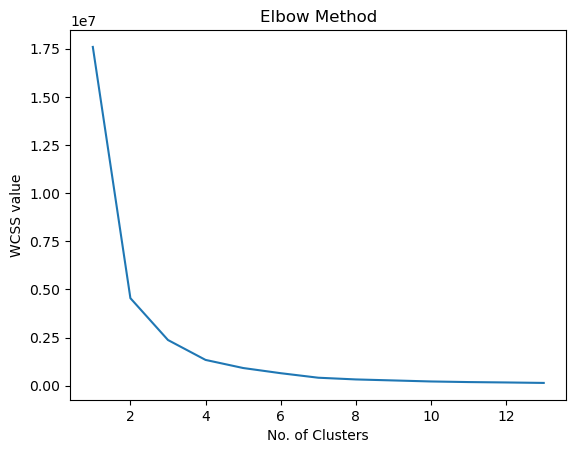

In [4]:
wcss = []
#an empty list is created
for i in range (1, 14):
    #a lop to iterate thg no. 1 to 13
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    #to create kmeans clustering model
    # first kmeans clustering is created with number of cluster = 1
    # initialization method k-means++ to avoid random initialization trap
    wcss.append(kmeans.inertia_)
    #kmeans.interia_ calculates wcss value and appended to wcs list
plt.plot(range(1,14), wcss)
#ploting the graph
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS value')
plt.show()
#elbow graph is displayed

In [5]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
#optimum number of cluster is found as 5
y_kmeans = kmeans.fit_predict(data)

In [6]:
y_kmeans

array([1, 1, 3, 3, 2, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 2, 2,
       1, 1, 1, 2, 3, 3, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1,
       1, 2])

In [7]:
sil_avg = silhouette_score(data, y_kmeans)
print(sil_avg)

0.5572288268257268


### Agglomerative clustering 

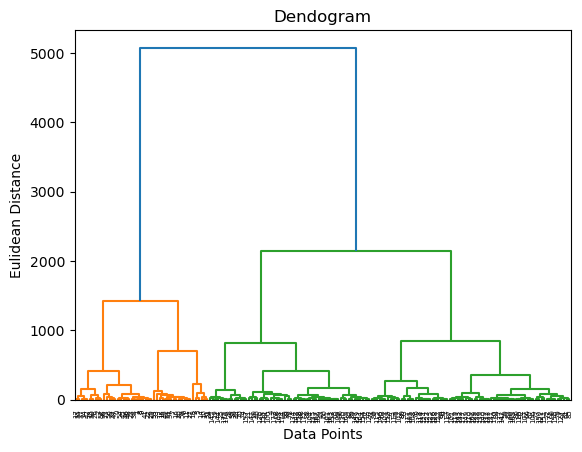

In [8]:
#plotting dendrogram
dendogram = sch.dendrogram(sch.linkage(data, method ='ward'))
#using linkage method dendogram is created for data1
#ward method used to adjust the variance happening when dendrogram is created
plt.title('Dendogram')
plt.xlabel('Data Points')
plt.ylabel('Eulidean Distance')
plt.show()

In [9]:
hc = ac(n_clusters = 2, affinity = 'euclidean', linkage='ward')
y_hc = hc.fit_predict(data)

In [10]:
y_hc

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [11]:
sil_avg_ac = silhouette_score(data, y_hc)
sil_avg_ac

0.6587292996216912

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

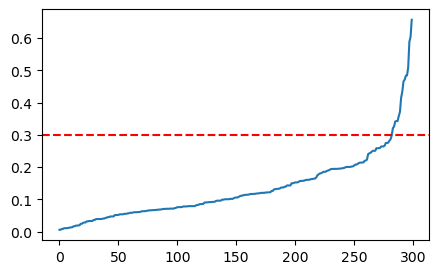

In [24]:
# need 2 parameters:
#    min_sample: minimum number of neighbouring points for clustering
#    eps: Epsilon neighborhood radius

# to find the optimal value of eps: construct plot distance of min_samples(k) nearest neighbours 
# and look for pronounced bend called knee



#  fits a NearestNeighbors object to data
nn = NearestNeighbors(n_neighbors = 2).fit(data)

# find distance of k closest neighbors
dist, ind = nn.kneighbors(data)

# sorts the distance
dist = np.sort(dist, axis=0)[:,1]

# plot the distance
plt.plot(dist)

# draws a horizontal line at bend
plt.axhline(y=.3, color='red', ls='--')

In [31]:
data, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.50, random_state=0)
db = DBSCAN(eps=0.3, min_samples=4).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
  
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(labels)
  


[-1  0  1  0  3 -1  2  1  0  0  2  4  1 -1  3  1  1  3  2  2  3  3  1  2
  2 -1  3  1 -1  1  0  0  1  0  0  0  0  4  2  3  1  2 -1  1  2  2  0  2
  0  3  2  3  0  3  3  2 -1  2  0  3  0  1 -1  2  2  2  0  3  4  2  1 -1
  0  2  2  0  2  1  3  0  3  1  3  3  0  1  3  1 -1  0  1  3  0  2  2  1
  3  3 -1 -1  0 -1  0  3  1  3 -1  1  0  1  2  2  3  0  3 -1  0  3  3  1
 -1  3  2  3  3  3  3  2  3  2  0  2  2 -1  0  2  2  0  1  0  4  2  1 -1
  5  2  0 -1  0  0  0  1 -1  1  3  2  0  2  3  1  0  1  1  3  1 -1 -1  1
  3  1  1  0  3  5 -1  0  3  3  1  2  3  1  2  2  1  1  1  1  3  0  1  2
  1  1  2  2  2  1  2  0  1  2  3  2  1 -1  2  0  1  0  1  2  1  5  0  2
  2  3 -1  1  0  3  3  2  3  2  1  0  0  5  1  0  1  3  2  1  3  2  0  2
  3  1 -1  0  0  0  0  2  2 -1 -1  2  3  1  2 -1 -1  3  3  0  1  1  2  3
  0  2  1  0  1  3  3  2  2 -1 -1  3  3 -1  0  0  3  3  1  3  3 -1  0 -1
  0  1 -1  3  0  0  0  3  3  1 -1  2]


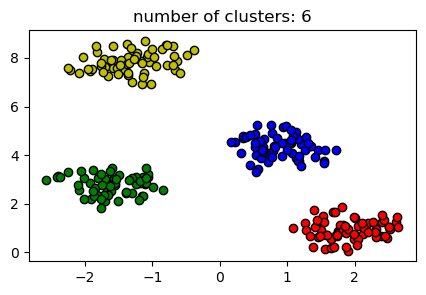

In [32]:
# Plot result
  
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
  
    class_member_mask = (labels == k)
  
    xy = data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
  
    xy = data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
  
plt.title('number of clusters: %d' % n_clusters_)
plt.show()

In [33]:
sil_avg_db = silhouette_score(data, labels)
sil_avg_db

0.40695526093590456